<font size=6><b>lec08. [실전-데이콘] 전화해지 고객 분류

<img src="./imgs/lec09.png">
* ref : https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split


# ----------------- 모델 ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# Data Load

<pre>
CRIM    : 범죄율  
          per capita crime rate by town
ZN      : 거주지비율(25,000 sq.ft.초과) 
          proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS   : 비상업지비율(창고)
          proportion of non-retail business acres per town
CHAS    : 찰스강인접여부(1:인접,0:그외)
          Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX     : 산화질소농도
          nitric oxides concentration (parts per 10 million)
RM      : 방갯수
          average number of rooms per dwelling
AGE     : 인접한 노후건물 비율 (1940년 이전)
          proportion of owner-occupied units built prior to 1940
DIS     : 고용센터와의 거리
          weighted distances to ﬁve Boston employment centers
RAD     : 고속도로 인접
          index of accessibility to radial highways
TAX     : 재산세
          full-value property-tax rate per $10,000
PTRATIO : 교사1인당 학생 비율
          pupil-teacher ratio by town 12. 
B       : 흑인비율
          1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
LSTAT   : 인접한 하위계층 비율
          % lower status of the population
MEDV    : 집가격 (단위 1000) ------------------------------------------------타겟
          Median value of owner-occupied homes in $1000s

## 헤더 컬럼이 없을 경우 (by 형진)

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./datasets/housing.csv', header=None, 
              delimiter=r"\s+", 
              names=column_names)

In [4]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


## Sklearn dataset

In [5]:
from sklearn.datasets import load_boston
dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['MEDV'] = dataset['target']
df.head(2)
df.to_csv("./datasets/boston.csv", index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# EDA

## 히스토그램

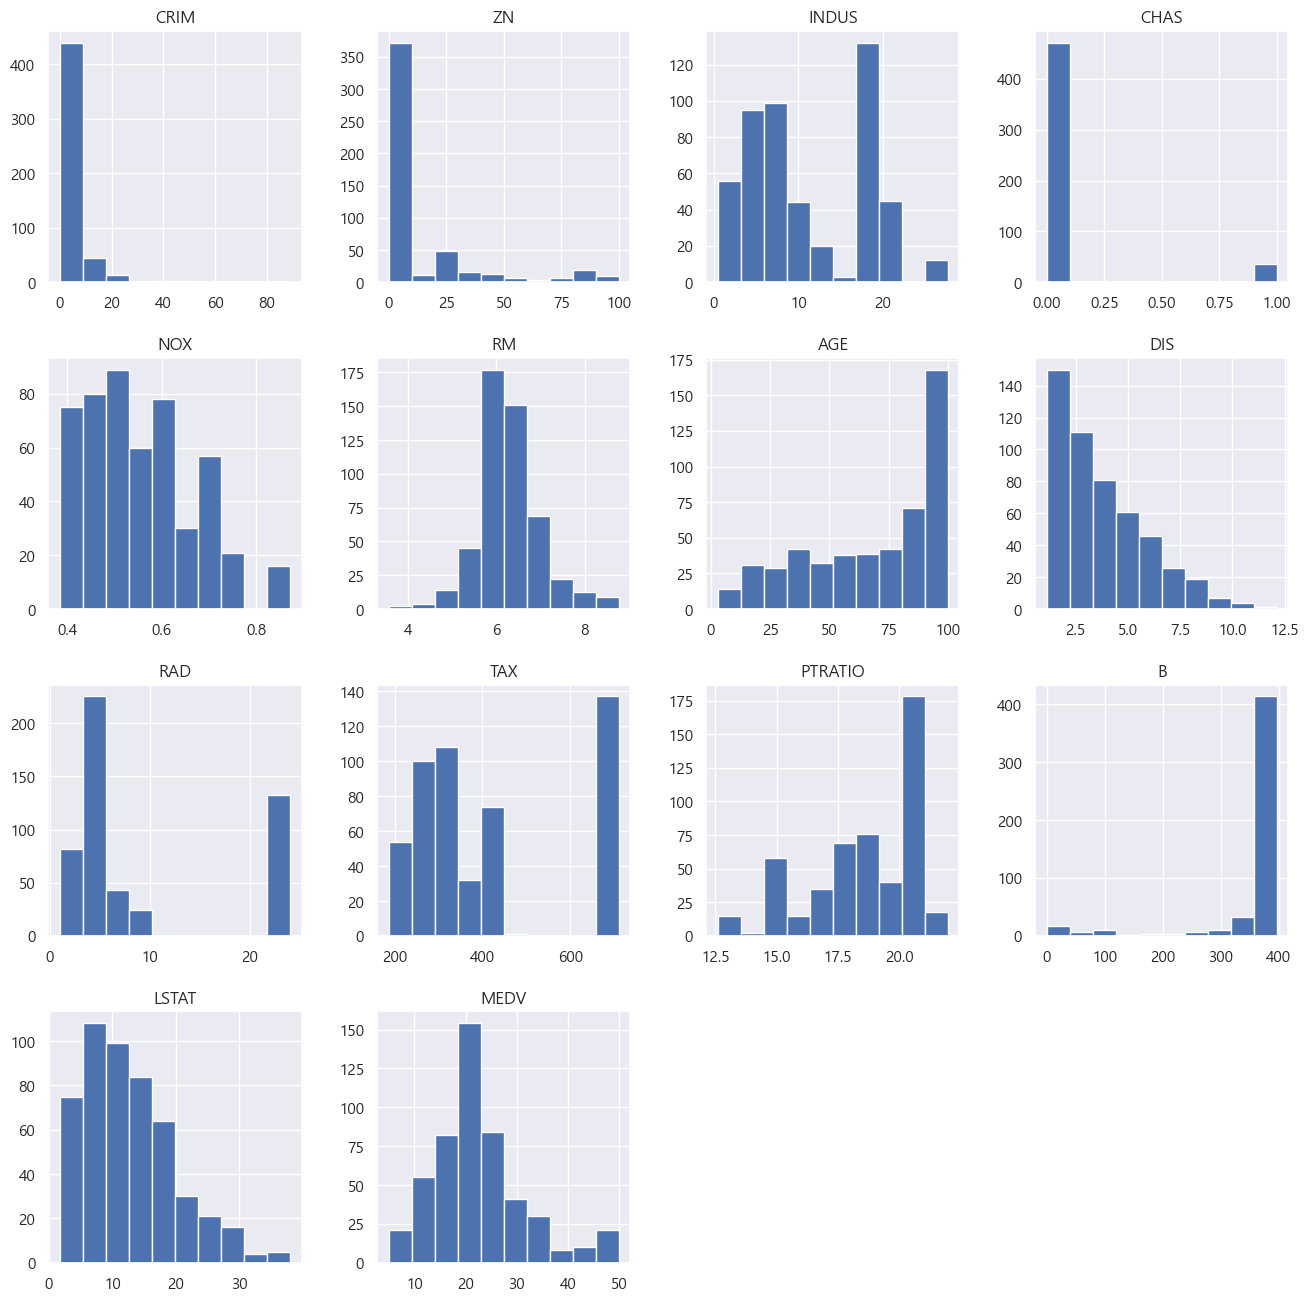

In [8]:
df.hist(figsize=(16,16))
plt.show()

## profile

In [9]:
from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Diabetes Dataset')
# profile.to_file(output_file='lec09_eda.html')

# 회귀 모델

## 모델

In [10]:
from pycaret.regression import *
s = setup(df, target = 'MEDV', silent=True) #, feature_selection = True)
models()

,Description,Value
0,session_id,8938
1,Target,MEDV
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 13)"


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPursuit,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## 평가 매트릭스

<table class="docutils align-default" width=700>
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Regression</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘explained_variance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score" title="sklearn.metrics.explained_variance_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.explained_variance_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘r2’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score" title="sklearn.metrics.r2_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.r2_score</span></code></a></p></td>
<td></td>
</tr>    
<tr class="row-odd"><td><b>MAE<br>‘neg_mean_absolute_error’</b></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error" title="sklearn.metrics.mean_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><b>MSE<br>‘neg_mean_squared_error’</b></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><b>RMSE<br>‘neg_root_mean_squared_error’</b></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><b>MSLE<br>‘neg_mean_squared_log_error’</b></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error" title="sklearn.metrics.mean_squared_log_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_log_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td>‘neg_median_absolute_error’</td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error" title="sklearn.metrics.median_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.median_absolute_error</span></code></a></p></td>
<td></td>
</tr>

<tr class="row-even"><td><p>‘max_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error" title="sklearn.metrics.max_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.max_error</span></code></a></p></td>
<td></td>
</tr>
    
<tr class="row-odd"><td><p>‘neg_mean_poisson_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_poisson_deviance.html#sklearn.metrics.mean_poisson_deviance" title="sklearn.metrics.mean_poisson_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_poisson_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_gamma_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_gamma_deviance.html#sklearn.metrics.mean_gamma_deviance" title="sklearn.metrics.mean_gamma_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_gamma_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_percentage_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error" title="sklearn.metrics.mean_absolute_percentage_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_percentage_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘d2_absolute_error_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_absolute_error_score.html#sklearn.metrics.d2_absolute_error_score" title="sklearn.metrics.d2_absolute_error_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_absolute_error_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘d2_pinball_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_pinball_score.html#sklearn.metrics.d2_pinball_score" title="sklearn.metrics.d2_pinball_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_pinball_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘d2_tweedie_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_tweedie_score.html#sklearn.metrics.d2_tweedie_score" title="sklearn.metrics.d2_tweedie_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_tweedie_score</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

# 힉습 & 평가

## train test 분리

In [11]:
df = pd.read_csv("./datasets/boston.csv")
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(404, 13) (102, 13) (404,) (102,)


## 1차 점수 : 21.0779
* $RMSE =  \sqrt{ \frac{\sum_{i=1}^n(y_{i} - \hat{y_{i}})^2}{n} }$

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# LinearRegression, DecisionTreeRegressor >> 스케일링의 영향 덜 받는다/
# Ridge >> 스케일링의 영향받는다

<pre>
<b>sklearn.metrics.mean_squared_error(y_true, y_pred, 
            <font color=red>squared=True (제곱여부)</font></b>
            sample_weight=None, multioutput='uniform_average')

<font color=red> If True returns MSE value, if False returns RMSE value.


In [13]:
lr = Ridge(alpha=1.0, random_state=11)
lr.fit(X_train, y_train)

#-------------------- 학습 후 주요 피쳐 확인
# print( lr.coef_ )

pred = lr.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")

mse = mean_squared_error(y_test, pred)  #, squared=True
print(f"RMSE : {np.sqrt(mse):.4f}")


RMSE : 5.8508
RMSE : 5.8508


## 공통함수

In [14]:
# def my_score(df, target='MEDV'):
#     y = df[target]
#     X = df.drop([target], axis=1)
    
#     # 원본 target 삭제
#     if target != 'MEDV' :
#         X.drop('MEDV', axis=1, inplace=True)
    
#     X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0)
#     #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#     lr = DecisionTreeRegressor(random_state=11) LinearRegression()
#     lr.fit(X_train, y_train)
#     pred = lr.predict(X_test)
#     rmse = mean_squared_error(y_test, pred, squared=False)
#     print(f"RMSE : {rmse:.4f}")

## 주요 피쳐 coef_(회귀계수) 

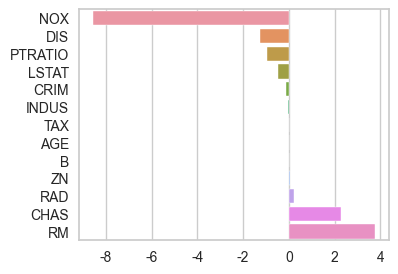

[-8.55779612e+00 -1.28009479e+00 -9.69288272e-01 -4.98849035e-01
 -1.16807614e-01 -2.37620690e-02 -1.15255734e-02 -1.04143035e-02
  8.53481709e-03  4.60034842e-02  2.22037885e-01  2.27814972e+00
  3.75513528e+00]


In [15]:
#-------------------- 학습 후 주요 피쳐 확인
# coef_df = pd.DataFrame([lr.coef_] , columns=X_train.columns)
# coef_df.T
plt.figure(figsize=(4,3))
s = pd.Series(lr.coef_, index=X_train.columns).sort_values()
sns.barplot(x=s.values, y=s.index)
plt.show()
print(s.values)

# 피쳐 가공

<font color=red size=4><b>성능 == 정규화(모수) == 오버피팅X == 일반화(예측력)</b></font>
<pre>
0. [시계열] 분해 
    - 계절성, 주기, ...
    - 통계검정


1. 피쳐가공 

    ---------------------------------------------
    <b>정규화(표준화Z)
        - 왜도/첨도 --> 아웃라이어, 스케일링</b>
    ---------------------------------------------
    1. 이상치/왜도/첨도 
    
    2. 스케일링 : 타켓,연속형(all,any)
        - log(타켓) --> *Scaler()
        - 주요/모든 피쳐   
    3. 다중공선 고려    
    ---------------------------------------------
    
    

    4. 범주형
        - 2진분류 -> 원핫인코딩 후 반드시 하나의 피쳐 삭제 (다중공선성 해소)
           예) gen (female , male) 
    
    
    
    5. 오버피팅
        - 규제          ****
        - 바이닝(구간화) **** 
        - 통계(평균,분산,편차) : 3편차(IQR:99.7%)
        * 학습 데이터(편향,학습량) + 모델의 복잡도(다차 --> 차원축소)


2. 피쳐 선택
    - sklearn.model_selection
    - 통계 OLS 레포트 : 피쳐 유의수준 **** p-value, R2, explan_radio
    
    
3. 모델 튜닝
    - 하이퍼파라미터(optuna) : 규제 시 주요 피쳐 변화
    - 앙상블
    - voting method : soft / hard
    - 스태킹 : 모델1,모델2 예측값   pred_train = pred1, pred2
                모델_n으로  pred_train을 예측(답안)


4. 검증
    - 학습량을 늘려라
      Fold 교차검증 : cross_val_score(), *SearchCV() , 
      CART 배깅(복원추출:부트스트랩)

        

<font size=4><b>Python Statistics Libraries</b></font>
* <font color=blue><b>Statistics</b></font><br>
    built-in Python library for <strong>기술통계(descriptive statistics)</strong> , datasets are not too large
* <font color=blue><b>NumPy</b></font> <br>
    third-party library for <strong>수치계산(numerical computing), (최적화)optimized</strong> for single, multi-dimensional <strong>arrays</strong>
* <font color=blue><b>★SciPy = (Statistics + Numpy)</b></font>  <br>
    third-party library for <strong>과학적 계산(scientific computing) based on NumPy</strong>, additional functionality for <strong>statistical analysis</strong>.
* <font color=blue><b>Pandas = ( + Numpy)</b></font> <br>
    third-party library for <strong>수치계산(numerical computing based on NumPy</strong>. It handles one-dimensional(1D) data with <strong>Series</strong> objects and two-dimensional(2D) data with <strong>DataFrame</strong> objects.
* <font color=blue><b>Matplotlib</b></font> <br>
    third-party library for <strong>data visualization</strong>

In [16]:
#----------------------------------Statistics
import statistics as ss
#----------------------------------numpy
import numpy as np
#----------------------------------scipy
# import scipy as sp      
import scipy.stats as stats
# from scipy.stats import skew, kurtosis

#----------------------------------pandas
import pandas as pd

## 왜도 / 첨도

<img width=200 src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FSPrkk%2Fbtq2QVhr4xa%2F1qRtlQKHst3dkmJnGxIvvk%2Fimg.png">

<pre> Kline(2005)은 
    왜도의 기준을 절대값 3을 초과하지 않고, (+-2)
    첨도는 절대값 8또는 10을 초과하지 않으면 정규분포로 볼 수 있다

* 왜도

In [17]:
def my_skew(data) :   
    res_sum = 0
    for i in data:
        res = ( (i-np.mean(data)) / np.std(data) ) ** 3
        res_sum = res_sum + res
    skew_res = res_sum / len(data)    
    return skew_res

data1 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,4,5] # 왼쪽치우침 (+)
data2 = [1,2,3,4,5,6,6,6,6,6,6] # 오른쪽치우침 (-)

my_skew(data1), my_skew(data2)

(1.9719339913942935, -0.911230773233526)

In [18]:
stats.skew(data1), stats.skew(data2)

(1.9719339913942937, -0.9112307732335252)

* 첨도 <br>
<img src="http://waurimal.dothome.co.kr/wp-content/uploads/2016/05/%EC%B2%A8%EB%8F%84-300x85.png">

In [19]:
def my_kurtosis(data):
    res_sum = 0
    for i in data:
        res = ( (i-np.mean(data)) / np.std(data) ) ** 4
        res_sum = res_sum + res
    kurtosis_res = (res_sum / len(data)) - 3
    return kurtosis_res   


data1 = [1,2,3,4,5,6,7,8,9,10] # 정규분포보다 덜 뾰족하다 (-)
data2 = [1,2,3,4,5,5,5,5,5,5,5,5,5,5,5, 5,6,7,8,9,10] #정균분포보다 더 뾰족하다 (+)

my_kurtosis(data1), my_kurtosis(data2)


(-1.2242424242424241, 0.7152272727272724)

In [20]:
stats.kurtosis(data1), stats.kurtosis(data2)

(-1.2242424242424244, 0.7152272727272728)

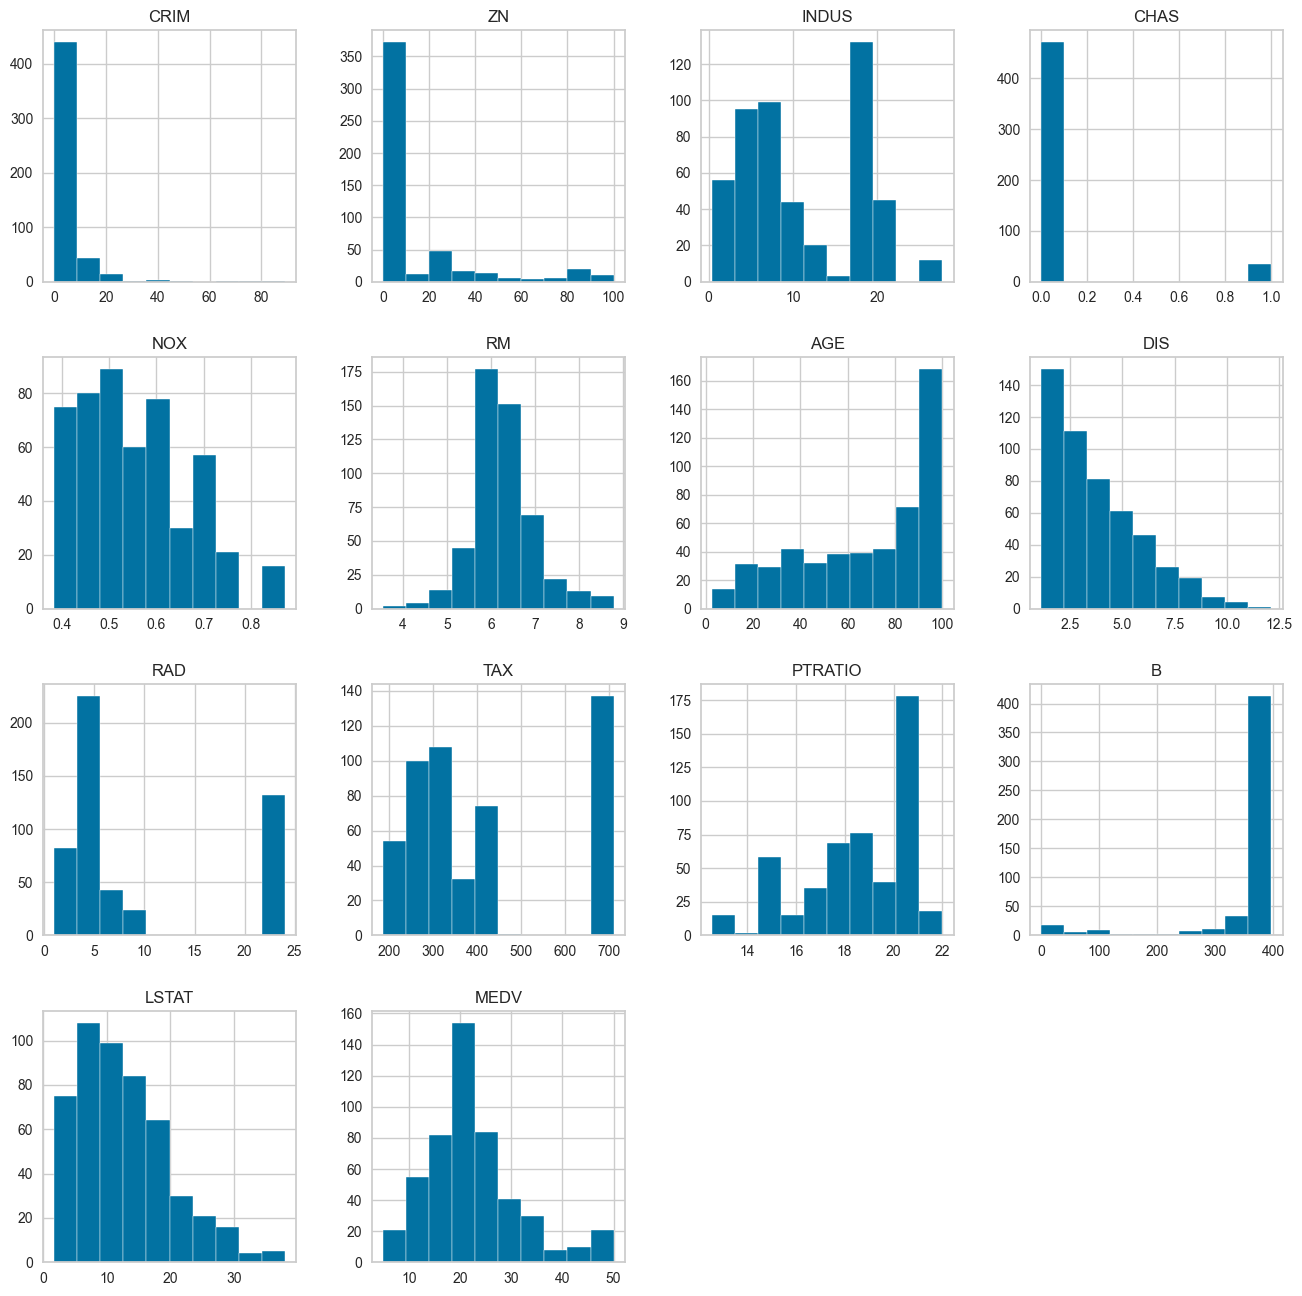

In [21]:
df.hist(figsize=(16,16))
plt.show()

In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### 왜도

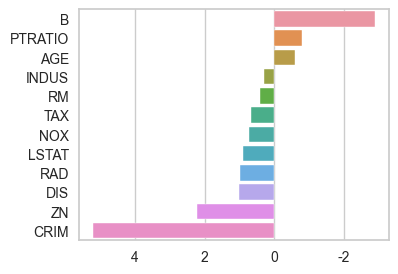

[-2.88179835 -0.79994453 -0.59718559  0.29414628  0.40241467  0.66796827
  0.72714416  0.90377074  1.00183349  1.00877876  2.21906306  5.20765239]


In [23]:
col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
plt.figure(figsize=(4,3))
s = pd.Series(stats.skew(X[col]), index=col).sort_values(ascending=True)
sns.barplot(x=s.values, y=s.index).invert_xaxis()
plt.show()
print(s.values)


### 첨도

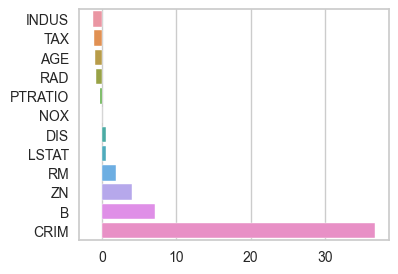

[-1.23321847 -1.14298488 -0.97001393 -0.8705205  -0.29411638 -0.07586422
  0.47129857  0.47654476  1.86102697  3.97994877  7.14376929 36.75278626]


In [24]:
col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
plt.figure(figsize=(4,3))
s = pd.Series(stats.kurtosis(X[col]), index=col).sort_values(ascending=True)
sns.barplot(x=s.values, y=s.index)
plt.show()
print(s.values)

## 이상치제거 


### TAX & LAD RMSE : 0.1917

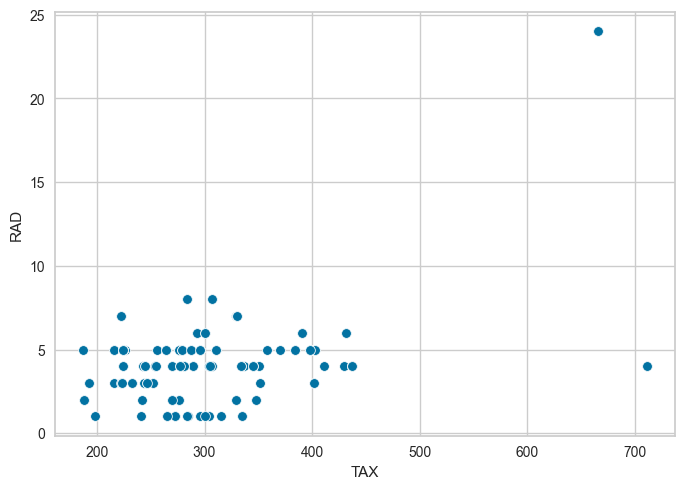

In [25]:
sns.scatterplot(data = X_train,x = "TAX", y="RAD")
plt.show()

In [26]:
print(df[(df["TAX"]>600) & (df["MEDV"]>49)].index)
print(df[(df["MEDV"]>49) & (df["RAD"]>20)].index)

Int64Index([368, 369, 370, 371, 372], dtype='int64')
Int64Index([368, 369, 370, 371, 372], dtype='int64')


In [27]:
df.loc[[368, 369, 370, 371, 372]]
# X_train.drop([368, 369, 370, 371, 372], axis=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


### CRIM RMSE : 0.1646

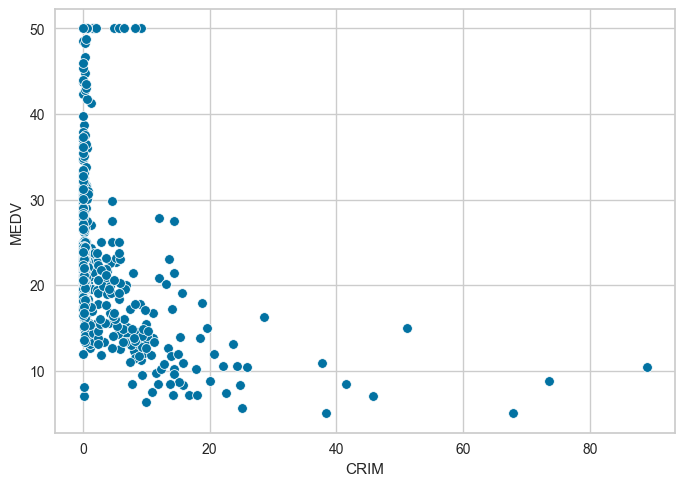

In [28]:
sns.scatterplot(data = df,x = "CRIM", y="MEDV")
plt.show()

In [29]:
df[df["CRIM"]>=80].index.values

array([380], dtype=int64)

In [30]:

df = pd.read_csv("./datasets/boston.csv")
df = df.drop([368, 369, 370, 371, 372,380],axis = 0)
y_log = np.log1p( df['MEDV'] )
X = df.drop(['MEDV'], axis=1)


X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# -------------- 점수보기 전 타겟 복원 -----------
# y_test = np.expm1(y_test_log)
# pred = np.expm1(pred_log)


# 점수 보고 계속 변환할 테니까 로그 한 상태로 사용하는 게 더 편리
# 점수 보자고 원복하면 모델 조정할 때마다 변환 반복해야 함
rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")

RMSE : 0.1646


In [31]:
# df[(df["RM"]>=8) & (df["MEDV"])<=30].index.values

In [32]:

df = pd.read_csv("./datasets/boston.csv")
df = df.drop([368, 369, 370, 371, 372], axis=0)
y_log = np.log1p( df['MEDV'] )
X = df.drop(['MEDV'], axis=1)


X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# -------------- 점수보기 전 타겟 복원 -----------
# y_test = np.expm1(y_test_log)
# pred = np.expm1(pred_log)


# 점수 보고 계속 변환할 테니까 로그 한 상태로 사용하는 게 더 편리
# 점수 보자고 원복하면 모델 조정할 때마다 변환 반복해야 함
rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")

RMSE : 0.1917


## 정규화(표준화Z) 
* 아웃라이어 제거 , 스케일링
    * 방법1) 왜도/첨도 심한 피쳐
    * 방법2) 전체 이산형 피쳐

### np.log1p(traget) :RMSE : 0.2278
1차 점수 : 5.7835  
로그스케일 : 5.74865
<pre> 
<font size=4 color=red><b>원복필수</b></font>
* log_traget = np.log1p(target)
* target     = np.expm1(log_traget)

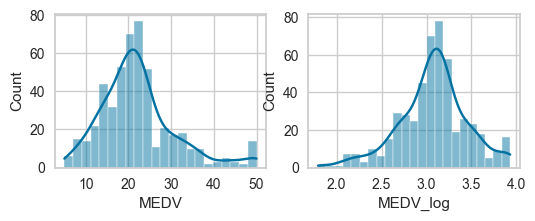

In [33]:
plt.figure(figsize=(6,2))
ax1 = plt.subplot(1,2,1)
# y.hist()
sns.histplot(data=df, x="MEDV", kde=True, ax=ax1)


ax2 = plt.subplot(1,2,2)
# np.log1p(y).hist()
df["MEDV_log"] = np.log1p(df["MEDV"])
sns.histplot(data=df, x="MEDV_log", kde=True, ax=ax2)
    
plt.show()

In [34]:

df = pd.read_csv("./datasets/boston.csv")

y_log = np.log1p( df['MEDV'] )
X = df.drop(['MEDV'], axis=1)


X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# -------------- 점수보기 전 타겟 복원 -----------
# y_test = np.expm1(y_test_log)
# pred = np.expm1(pred_log)


# 점수 보고 계속 변환할 테니까 로그 한 상태로 사용하는 게 더 편리
# 점수 보자고 원복하면 모델 조정할 때마다 변환 반복해야 함
rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")

RMSE : 0.2278


In [35]:
원본 = df['MEDV'][:5]
로그 = np.log1p( 원본 )
복원 = np.expm1( 로그 )
print(원본)
print(로그)
print(복원)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64
0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: MEDV, dtype: float64
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


### 스케일링 : RMSE : 0.2246


* 일반 이산형 피쳐
    * 방법1) 왜도/첨도가 심한 피쳐 위주
    * 방법2) 모든 피쳐

In [36]:
X_train.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [38]:
df = pd.read_csv("./datasets/boston.csv")

y_log = np.log1p( df['MEDV'] )
X = df.drop(['MEDV'], axis=1)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)


#-------------스케일링(카테고리성 피쳐 제외!!!)-------------
col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
scaler = StandardScaler()   
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train[col])
# 카테고리성 피쳐는 빼놓고!!!


X_train[col] = scaler.transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])
# arr값



# scaler.fit(X_train['CRIM'].values.reshape(-1, 1))
# X_train['CRIM'] = scaler.transform(X_train['CRIM'].values.reshape(-1, 1))
# X_test['CRIM']  = scaler.transform(X_test['CRIM'].values.reshape(-1, 1))


# -------------- 학습 -----------
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# # -------------- 점수보기 전 타겟 복원 -----------
# pred   = scaler.inverse_transform(pred_scaler)
# y_test = scaler.inverse_transform(y_test_scaler)
# temp_y_test = np.expm1(y_test_log)
# temp_pred   = np.expm1(pred)

rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")


RMSE : 0.2246


## 상관분석

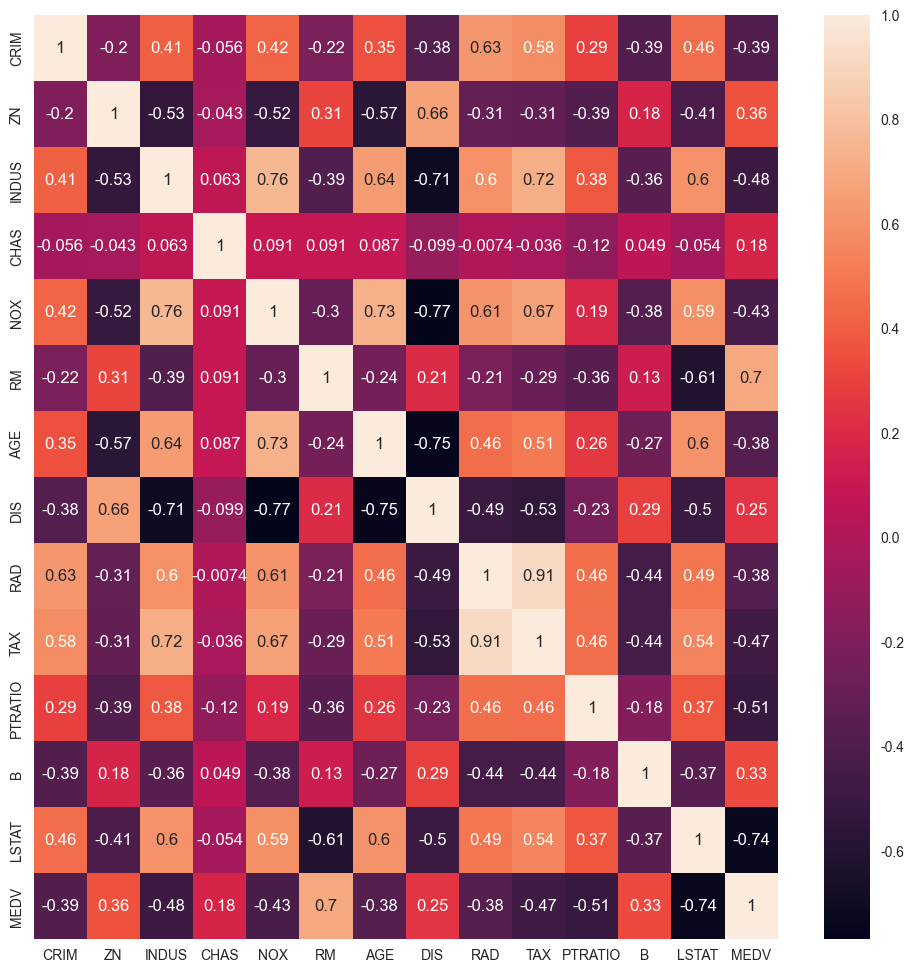

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)
plt.show()

* 상관도 높다 >> RM(0.74), LSTAT(-0.75)
* 다중공선 >> TAX & RAD (0.91) >> 타겟과 상관관계 높은 TAX를 남기고, RAD 지운다

### 다중공선 피쳐 삭제 (RAD) RMSE : 0.1714

In [40]:
df = pd.read_csv("./datasets/boston.csv")
df_cp = df.copy()
df_cp  = df_cp.drop("RAD", axis=1)
df_cp  = df_cp.drop([368, 369, 370, 371, 372,380],axis = 0)

y_log = np.log1p( df_cp['MEDV'] )
X = df_cp.drop(['MEDV'], axis=1)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)



#-------------스케일링(카테고리성 피쳐 제외!!!)-------------
col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',  'TAX',
       'PTRATIO', 'B', 'LSTAT']
scaler = StandardScaler()   
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train[col])
# 카테고리성 피쳐는 빼놓고!!!


X_train[col] = scaler.transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])
# arr값



# scaler.fit(X_train['CRIM'].values.reshape(-1, 1))
# X_train['CRIM'] = scaler.transform(X_train['CRIM'].values.reshape(-1, 1))
# X_test['CRIM']  = scaler.transform(X_test['CRIM'].values.reshape(-1, 1))


# -------------- 학습 -----------
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# # -------------- 점수보기 전 타겟 복원 -----------
# pred   = scaler.inverse_transform(pred_scaler)
# y_test = scaler.inverse_transform(y_test_scaler)
# temp_y_test = np.expm1(y_test_log)
# temp_pred   = np.expm1(pred)

rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")


RMSE : 0.1714


### 다중공선 피쳐 삭제 (RAD,TAX) RMSE : 0.1722

In [41]:
df = pd.read_csv("./datasets/boston.csv")
df_cp = df.copy()
df_cp  = df_cp.drop(["RAD","TAX"], axis=1)
df_cp  = df_cp.drop([368, 369, 370, 371, 372,380],axis = 0)

y_log = np.log1p( df_cp['MEDV'] )
X = df_cp.drop(['MEDV'], axis=1)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)



#-------------스케일링(카테고리성 피쳐 제외!!!)-------------
col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',  
       'PTRATIO', 'B', 'LSTAT']
scaler = StandardScaler()   
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train[col])
# 카테고리성 피쳐는 빼놓고!!!


X_train[col] = scaler.transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])
# arr값



# scaler.fit(X_train['CRIM'].values.reshape(-1, 1))
# X_train['CRIM'] = scaler.transform(X_train['CRIM'].values.reshape(-1, 1))
# X_test['CRIM']  = scaler.transform(X_test['CRIM'].values.reshape(-1, 1))


# -------------- 학습 -----------
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# # -------------- 점수보기 전 타겟 복원 -----------
# pred   = scaler.inverse_transform(pred_scaler)
# y_test = scaler.inverse_transform(y_test_scaler)
# temp_y_test = np.expm1(y_test_log)
# temp_pred   = np.expm1(pred)

rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")


RMSE : 0.1722


### 다중공선 피쳐 차원축소 RMSE : 0.1641

In [42]:
from sklearn.decomposition import PCA

<pre>
sklearn.decomposition.PCA(n_components=None, *
, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)[source]¶

In [43]:
pca = PCA(n_components=1)
pca.fit(df[["RAD","TAX"]])
print(pca.explained_variance_ratio_)
df["RAD","TAX"]=pca.transform(df[["RAD","TAX"]])
df = df.drop([368, 369, 370, 371, 372,380],axis = 0)

y_log = np.log1p( df['MEDV'] )
X = df.drop(['MEDV'], axis=1)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)



#-------------스케일링(카테고리성 피쳐 제외!!!)-------------
col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',  'TAX',
       'PTRATIO', 'B', 'LSTAT']
scaler = StandardScaler()   
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train[col])
# 카테고리성 피쳐는 빼놓고!!!


X_train[col] = scaler.transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])
# arr값



# scaler.fit(X_train['CRIM'].values.reshape(-1, 1))
# X_train['CRIM'] = scaler.transform(X_train['CRIM'].values.reshape(-1, 1))
# X_test['CRIM']  = scaler.transform(X_test['CRIM'].values.reshape(-1, 1))


# -------------- 학습 -----------
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# # -------------- 점수보기 전 타겟 복원 -----------
# pred   = scaler.inverse_transform(pred_scaler)
# y_test = scaler.inverse_transform(y_test_scaler)
# temp_y_test = np.expm1(y_test_log)
# temp_pred   = np.expm1(pred)

rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")


[0.99954451]
RMSE : 0.1641


In [44]:
# n_components : 투영선 갯수
# explained_variance_ratio_ : 설명가능한 비율

## 구간화(바이닝)
* 연속형

### PTRATIO 바이닝 RMSE : 0.1641

<AxesSubplot: >

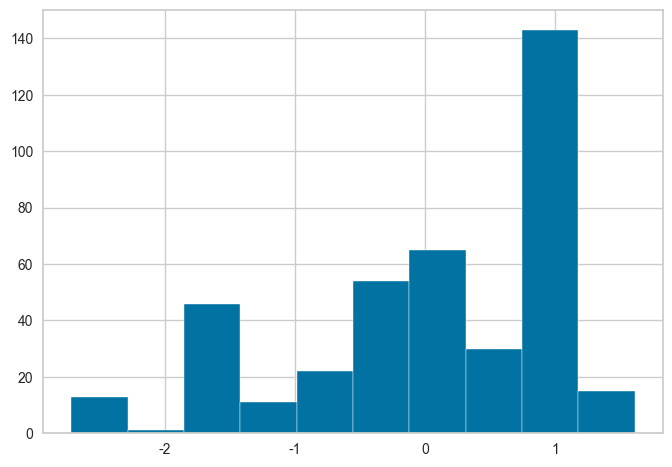

In [45]:
X_train["PTRATIO"].hist()

In [46]:
X_train["PTRATIO"].describe()

count    4.000000e+02
mean     1.498801e-15
std      1.001252e+00
min     -2.718880e+00
25%     -5.069098e-01
50%      2.764962e-01
75%      7.834060e-01
max      1.612895e+00
Name: PTRATIO, dtype: float64

In [47]:
q1, q2, q3 = X_train['PTRATIO'].quantile([0.25,0.5,0.75])
# q2 = X_train['PTRATIO'].quantile(0.5)
# q3 = X_train['PTRATIO'].quantile(0.75)
print(q1, q2, q3)

X_train['pt_bin'] = 1
X_train.loc[ X_train[(X_train['PTRATIO']<q1)].index, 'pt_bin'] = 1
X_train.loc[ X_train[(X_train['PTRATIO']>= q1) & (X_train['PTRATIO']<q2)].index, 'pt_bin'] = 2
X_train.loc[ X_train[(X_train['PTRATIO']>= q2) & (X_train['PTRATIO']<q3)].index, 'pt_bin'] = 3
X_train.loc[ X_train[(X_train['PTRATIO']>= q3) & (X_train['PTRATIO']<1)].index, 'pt_bin'] = 4

X_test['pt_bin'] = 1
X_test.loc[ X_test[(X_test['PTRATIO']<q1)].index, 'pt_bin'] = 1
X_test.loc[ X_test[(X_test['PTRATIO']>= q1) & (X_test['PTRATIO']<q2)].index, 'pt_bin'] = 2
X_test.loc[ X_test[(X_test['PTRATIO']>= q2) & (X_test['PTRATIO']<q3)].index, 'pt_bin'] = 3
X_test.loc[ X_test[(X_test['PTRATIO']>= q3) & (X_test['PTRATIO']< 1)].index, 'pt_bin'] = 4

-0.506909751171156 0.27649622791154244 0.7834059790826984


In [48]:
X_train["pt_bin"].unique()

array([1, 4, 3, 2], dtype=int64)

### NOX 바이닝 RMSE : 0.1641

In [49]:
# pca = PCA(n_components=1)
# pca.fit(df[["RAD","TAX"]])
# print(pca.explained_variance_ratio_)
# df["RAD","TAX"]=pca.transform(df[["RAD","TAX"]])
# df = df.drop([368, 369, 370, 371, 372,380],axis = 0)

y_log = np.log1p( df['MEDV'] )
X = df.drop(['MEDV'], axis=1)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)



#-------------스케일링(카테고리성 피쳐 제외!!!)-------------
col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',  'TAX',
       'PTRATIO', 'B', 'LSTAT']
scaler = StandardScaler()   
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train[col])
# 카테고리성 피쳐는 빼놓고!!!


X_train[col] = scaler.transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])
# arr값



# scaler.fit(X_train['CRIM'].values.reshape(-1, 1))
# X_train['CRIM'] = scaler.transform(X_train['CRIM'].values.reshape(-1, 1))
# X_test['CRIM']  = scaler.transform(X_test['CRIM'].values.reshape(-1, 1))


# -------------- 학습 -----------
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# # -------------- 점수보기 전 타겟 복원 -----------
# pred   = scaler.inverse_transform(pred_scaler)
# y_test = scaler.inverse_transform(y_test_scaler)
# temp_y_test = np.expm1(y_test_log)
# temp_pred   = np.expm1(pred)

rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")


RMSE : 0.1641


In [50]:
q1, q2, q3 = X_train['NOX'].quantile([0.25,0.5,0.75])
# q2 = X_train['PTRATIO'].quantile(0.5)
# q3 = X_train['PTRATIO'].quantile(0.75)
print(q1, q2, q3)

X_train['nox_bin'] = 1
X_train.loc[ X_train[(X_train['PTRATIO']<q1)].index, 'nox_bin'] = 1
X_train.loc[ X_train[(X_train['PTRATIO']>= q1) & (X_train['PTRATIO']<q2)].index, 'nox_bin'] = 2
X_train.loc[ X_train[(X_train['PTRATIO']>= q2) & (X_train['PTRATIO']<q3)].index, 'nox_bin'] = 3
X_train.loc[ X_train[(X_train['PTRATIO']>= q3) & (X_train['PTRATIO']<1)].index, 'nox_bin'] = 4

X_test['nox_bin'] = 1
X_test.loc[ X_test[(X_test['PTRATIO']<q1)].index, 'nox_bin'] = 1
X_test.loc[ X_test[(X_test['PTRATIO']>= q1) & (X_test['PTRATIO']<q2)].index, 'nox_bin'] = 2
X_test.loc[ X_test[(X_test['PTRATIO']>= q2) & (X_test['PTRATIO']<q3)].index, 'nox_bin'] = 3
X_test.loc[ X_test[(X_test['PTRATIO']>= q3) & (X_test['PTRATIO']< 1)].index, 'nox_bin'] = 4

-0.9251080311038687 -0.14845247388267083 0.6020236825333177


In [72]:
# pca = PCA(n_components=1)
# pca.fit(df[["RAD","TAX"]])
# print(pca.explained_variance_ratio_)
# df["RAD","TAX"]=pca.transform(df[["RAD","TAX"]])
# df = df.drop([368, 369, 370, 371, 372,380],axis = 0)
df = pd.read_csv("./datasets/boston.csv")
y_log = np.log1p( df['MEDV'] )
X = df.drop(['MEDV'], axis=1)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)
lr = Ridge(alpha=1.0, random_state=11)



#-------------스케일링(카테고리성 피쳐 제외!!!)-------------
col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',  'TAX',
       'PTRATIO', 'B', 'LSTAT']
scaler = StandardScaler()   
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train[col])
# 카테고리성 피쳐는 빼놓고!!!


X_train[col] = scaler.transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])
# arr값



# scaler.fit(X_train['CRIM'].values.reshape(-1, 1))
# X_train['CRIM'] = scaler.transform(X_train['CRIM'].values.reshape(-1, 1))
# X_test['CRIM']  = scaler.transform(X_test['CRIM'].values.reshape(-1, 1))


# -------------- 학습 -----------
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# # -------------- 점수보기 전 타겟 복원 -----------
# pred   = scaler.inverse_transform(pred_scaler)
# y_test = scaler.inverse_transform(y_test_scaler)
y_test = np.expm1(y_test_log)
pred   = np.expm1(pred)

rmse = mean_squared_error(y_test_log, pred_log, squared=False)
print(f"RMSE : {rmse:.4f}")


RMSE : 0.2245


# 모델

In [52]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

# https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor
XGBRegressor()

# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
LGBMRegressor()

## Sklearn Model

In [53]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

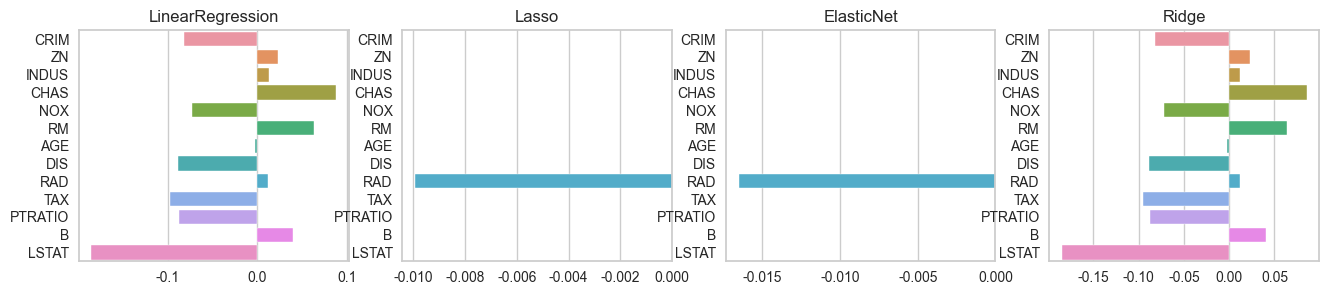

In [68]:
p, axes = plt.subplots(1,4, figsize=(16,3))

model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge() ]

for i, model in enumerate(model_list):
    model.fit(X_train, y_train_log)
    # print(X.columns)
    # print(model.coef_)
    # print(model.intercept_)
    axes[i].set_title(model.__class__.__name__)
    sns.barplot(x=model.coef_, y=X_train.columns,  ax=axes[i])  # must supply a tuple to get_group with multiple grouping keys

## Boost Model

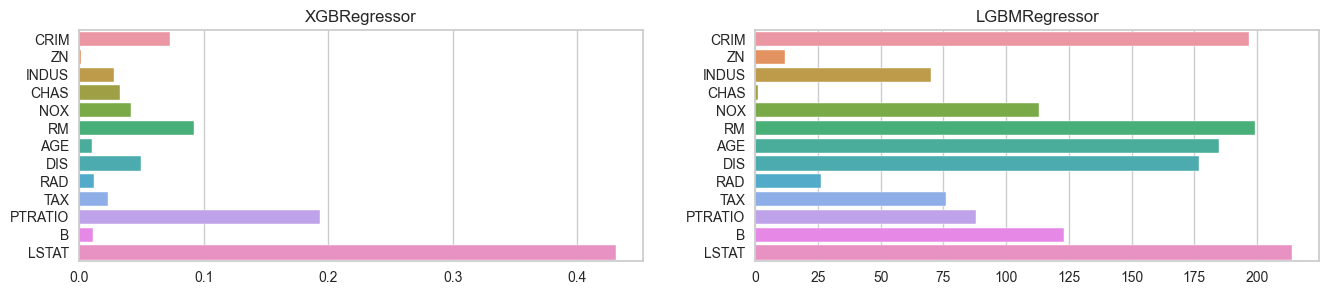

In [56]:
p, axes = plt.subplots(1,2, figsize=(16,3))
model_list = [XGBRegressor(),LGBMRegressor()]      
for i, model in enumerate(model_list):
    model.fit(X_train, y_train_log)
    #print(model.feature_importances_)
    axes[i].set_title(model.__class__.__name__)
    sns.barplot(y=X_train.columns, x=model.feature_importances_, ax=axes[i])

## 파라미터 튜닝

### 규제 적용에 따른 학습 변화

In [70]:


alpha_list=[0.01,0.1,1,10,100]

for i, alpha in enumerate(alpha_list):
        lasso = Lasso(alpha=alpha)
        y_pred_lasso = lasso.fit(X_train, y_train_log).predict(X_test)
        
        rmse = mean_squared_error(y_test_log, y_pred_lasso, squared=False)
        print(f"RMSE : {rmse:.4f}")

RMSE : 0.2364
RMSE : 0.2742
RMSE : 0.3490
RMSE : 0.3680
RMSE : 0.3680


In [71]:
alpha_list=[0.01,0.1,1,10,100]

for i, alpha in enumerate(alpha_list):
        ridge = Ridge(alpha=alpha)
        y_pred_ridge = ridge.fit(X_train, y_train_log).predict(X_test)
        
        rmse = mean_squared_error(y_test_log, y_pred_ridge, squared=False)
        print(f"RMSE : {rmse:.4f}")

RMSE : 0.2242
RMSE : 0.2242
RMSE : 0.2245
RMSE : 0.2268
RMSE : 0.2414


## Optuna 파라미터 튜닝

In [73]:
import optuna

In [83]:
def my_objective_LGBM(trial, data=X_train, target=y_train):
    
    #train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        'metric': 'rmse', 
        'random_state': 11,
        'n_estimators': 100,  #100
        'reg_alpha' : trial.suggest_float('reg_alpha', 1e-2, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-2, 10.0),  #reg_alpha=0.0
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01,0.1),
        'max_depth': trial.suggest_categorical('max_depth', [1,30]),
        #'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        #'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        #'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        #'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        #'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = LGBMRegressor(**param)  
    
    model.fit(X_train,y_train
              ,eval_set=[(X_test,y_test)]
              ,early_stopping_rounds=10,verbose=False)
    pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, pred,squared=False)
    return rmse

In [84]:
study = optuna.create_study(direction='minimize')


y_train = np.expm1(y_train_log)
y_test  = np.expm1(y_test_log)


# my_objective_LGBM(trial):
# study.optimize(my_objective_LGBM, n_trials=50)

# def my_objective_LGBM(trial, data=X_train, target=y_train):
study.optimize(lambda trial : my_objective_LGBM(trial, y_train,y_test), n_trials=50)

[I 2023-03-24 17:50:22,498] A new study created in memory with name: no-name-7f25f3dd-d141-4615-b995-c3008fea92e0
[I 2023-03-24 17:50:22,522] Trial 0 finished with value: 6.687714809026826 and parameters: {'reg_alpha': 2.873308423421703, 'reg_lambda': 8.691688837468416, 'learning_rate': 0.012475509844627782, 'max_depth': 1}. Best is trial 0 with value: 6.687714809026826.
[I 2023-03-24 17:50:22,601] Trial 1 finished with value: 5.001847121789206 and parameters: {'reg_alpha': 4.307902689127809, 'reg_lambda': 3.3474608855161283, 'learning_rate': 0.0708507182540534, 'max_depth': 30}. Best is trial 1 with value: 5.001847121789206.
[I 2023-03-24 17:50:22,646] Trial 2 finished with value: 4.996793626695435 and parameters: {'reg_alpha': 6.796346218173522, 'reg_lambda': 9.28984883700347, 'learning_rate': 0.08640155701940005, 'max_depth': 30}. Best is trial 2 with value: 4.996793626695435.
[I 2023-03-24 17:50:22,667] Trial 3 finished with value: 6.0233739909329875 and parameters: {'reg_alpha': 7

In [85]:
print('튜닝 횟수 :', len(study.trials))
print("-------------------")
print('Best param:', study.best_trial.params)
print('Best param:', study.best_params)
print("-------------------")
print('Best score:', study.best_trial.value)
print("-------------------")
print('study.trials 전체 정보 :', study.trials)


튜닝 횟수 : 50
-------------------
Best param: {'reg_alpha': 6.629556748561002, 'reg_lambda': 9.942151112174335, 'learning_rate': 0.09300102532413541, 'max_depth': 30}
Best param: {'reg_alpha': 6.629556748561002, 'reg_lambda': 9.942151112174335, 'learning_rate': 0.09300102532413541, 'max_depth': 30}
-------------------
Best score: 4.869357542333436
-------------------
study.trials 전체 정보 : [FrozenTrial(number=0, state=TrialState.COMPLETE, values=[6.687714809026826], datetime_start=datetime.datetime(2023, 3, 24, 17, 50, 22, 500171), datetime_complete=datetime.datetime(2023, 3, 24, 17, 50, 22, 522108), params={'reg_alpha': 2.873308423421703, 'reg_lambda': 8.691688837468416, 'learning_rate': 0.012475509844627782, 'max_depth': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'reg_alpha': FloatDistribution(high=10.0, log=False, low=0.01, step=None), 'reg_lambda': FloatDistribution(high=10.0, log=False, low=0.01, step=None), 'learning_rate': FloatDistribution(high=0.1, l